# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [24]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

alpha sigma ratio


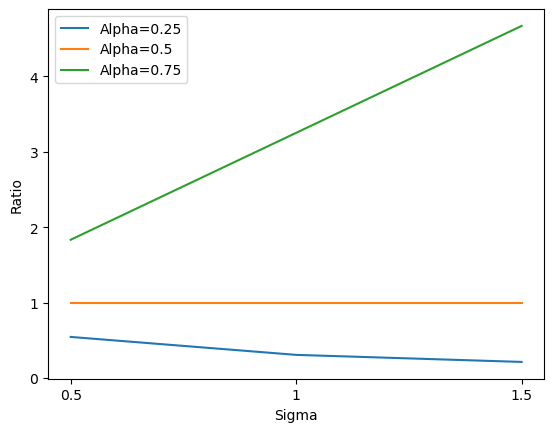

[0.5454545454545454, 0.3076923076923077, 0.21428571428571427, 1.0, 1.0, 1.0, 1.8333333333333333, 3.25, 4.666666666666667]


In [54]:
# code for solving the model (remember documentation and comments)
hm = HouseholdSpecializationModelClass()


import matplotlib.pyplot as plt
import ipywidgets as widgets
from array import *
# a. calculations
alphavalues = [0.25,0.5,0.75]
sigmavalues = [0.5,1,1.5]
alphaoutput= []
sigmaoutput= []
ratiooutput = []
print("alpha", "sigma", "ratio")
for a in alphavalues:
    for s in sigmavalues:
        hm.par.alpha = a
        alphaoutput.append(a)
        hm.par.sigma = s
        sigmaoutput.append(s)
        ratiooutput.append(hm.solve_discrete().ratio)
        



plt.plot(ratiooutput[:3],label="Alpha=0.25")
plt.plot(ratiooutput[3:6],label="Alpha=0.5")
plt.plot(ratiooutput[6:9],label="Alpha=0.75")
plt.legend()
plt.ylabel("Ratio")
plt.xticks([0,1,2],[0.5,1,1.5])
plt.xlabel("Sigma")

plt.show()
print(ratiooutput)

# Question 2

Explain your code and procedure

In [3]:
# code

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.